## Question 11  / 12 
#### a)The question 11 will bring in all the 20 categories first.
#### b)Build the TF-IDF matrix and perform SVD.
#### c)Find purity measures like Completeness,Homogeneity etc
#### d)Plot purity measures on 2 D space
#### e)Plot contingency matrix
#### f) Plot the best cluster/contingency matrix and scores
#### Repeat above steps for NMF with scale/log scale/scale log

In [41]:
#Library for dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics

#Importing the datasets
dataset = fetch_20newsgroups(subset = 'all', shuffle = True, random_state = 0)
x = dataset.data
y = dataset.target

# Remove stop words
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
import re
pop = []
for i in range(len(x)):
    text = re.sub('[^a-zA-Z]', ' ', x[i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    pop.append(text)   
    
# TFIDF 
tfidf = TfidfVectorizer(min_df=3)
tfidf_matrix = tfidf.fit_transform(pop)
print(tfidf_matrix.shape)

#Fitting K-means and predicting the output class
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=1)
#kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=30,max_iter=1000)
ykm0 = kmeans.fit_predict(tfidf_matrix)

#Metrics
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm0))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm0))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm0))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm0))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm0))


(18846, 44866)
Homogeneity: 0.3061
Completeness: 0.3846
V-measure: 0.3409
Adjusted Rand-Index: 0.1045
Adjusted Mutual Info score: 0.3038


Current r value sweeping = 1


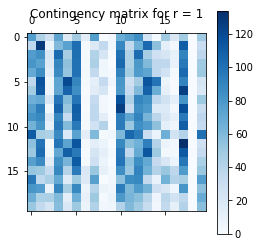

Current r value sweeping = 2


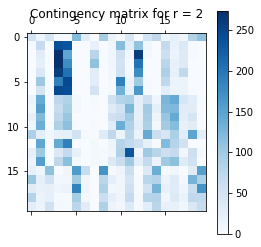

Current r value sweeping = 3


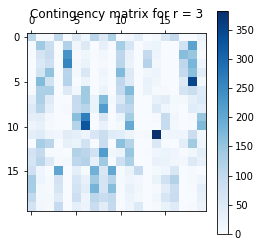

Current r value sweeping = 5


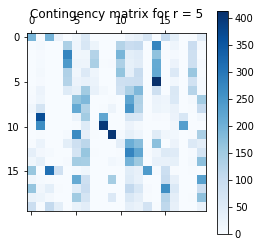

Current r value sweeping = 10


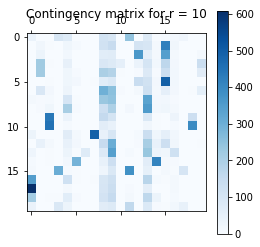

Current r value sweeping = 20


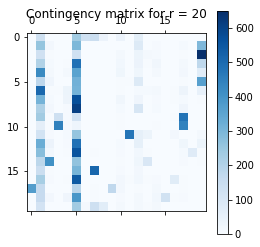

Current r value sweeping = 50


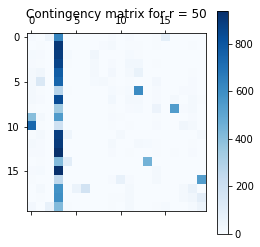

Current r value sweeping = 100


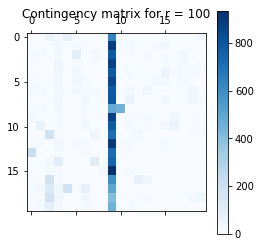

Current r value sweeping = 300


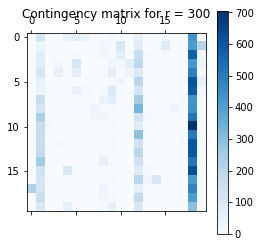

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

#dimensionality reduction
r = [1,2,3,5,10,20,50,100,300]

#Metric buckets
cont_matrix = []
homogenity = []
completeness = []
vmeasure = [] 
adjrand = []
adjmutualinfo = []

for iter in r:
    print('Current r value sweeping = %d' %iter)
# SVD dim reduction
    nmf = NMF(n_components = iter, random_state = 0)
    feature_mat = nmf.fit_transform(tfidf_matrix)
# K means based on SVD dim reduction
    kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=1)
    ykm = kmeans.fit_predict(feature_mat)
# Conf Matrix ( y= dataset.target)
    mat = confusion_matrix(y, ykm)  
    cont_matrix.append(mat)
# Plots 
    plt.matshow(mat,cmap=plt.cm.Blues)
    plt.colorbar()
    plt.title('Contingency matrix for r = %d' %iter)
    plt.show()
#http://scikit-learn.org/stable/auto_examples/text/document_clustering.html   
    homogenity.append(metrics.homogeneity_score(y, ykm))
    completeness.append(metrics.completeness_score(y, ykm))
    vmeasure.append(metrics.v_measure_score(y, ykm))
    adjrand.append(metrics.adjusted_rand_score(y, ykm))
    adjmutualinfo.append(metrics.adjusted_mutual_info_score(y, ykm))


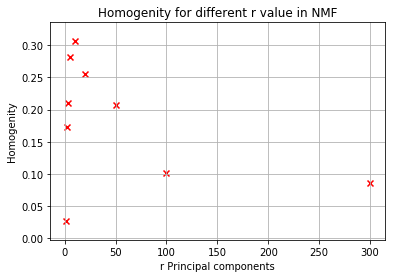

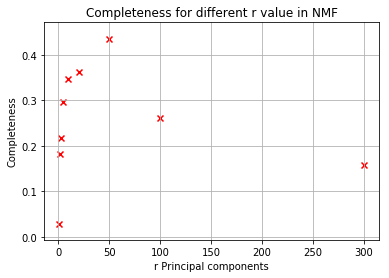

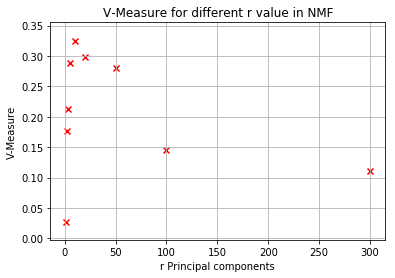

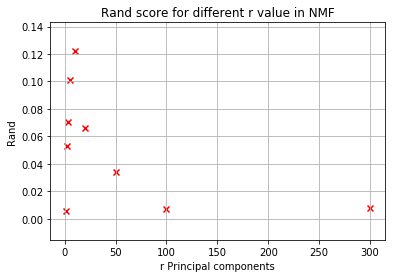

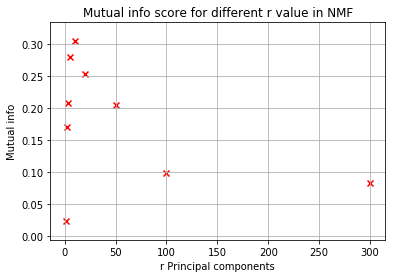

In [45]:
#Plot metrics
#plot the homogenity score
sp = plt.scatter(x= r,y= homogenity,color='r',marker='x')
plt.ylabel('Homogenity')
plt.xlabel('r Principal components')
plt.title('Homogenity for different r value in NMF')
plt.grid(True)
plt.show()
#plot the completeness score
plt.scatter(x= r,y= completeness,color='r',marker='x')
plt.ylabel('Completeness')
plt.xlabel('r Principal components')
plt.title('Completeness for different r value in NMF')
plt.grid(True)
plt.show()
#plot vmeasure score
plt.scatter(x= r,y= vmeasure,color='r',marker='x')
plt.ylabel('V-Measure')
plt.xlabel('r Principal components')
plt.title('V-Measure for different r value in NMF')
plt.grid(True)
plt.show()
#plot rand score
plt.scatter(x= r,y= adjrand,color='r',marker='x')
plt.ylabel('Rand')
plt.xlabel('r Principal components')
plt.title('Rand score for different r value in NMF')
plt.grid(True)
plt.show()
#plot mutual information score
plt.scatter(x= r,y= adjmutualinfo,color='r',marker='x')
plt.ylabel('Mutual info')
plt.xlabel('r Principal components')
plt.title('Mutual info score for different r value in NMF')
plt.grid(True)
plt.show()



[[0.02663024971170561, 0.17307012348839854, 0.2100232622623944, 0.28118291275167784, 0.30641369938912616, 0.254954117393355, 0.20662383907279783, 0.10074336779562938, 0.08614500800006401], [0.029145760045424955, 0.18205269916278907, 0.21650239295714752, 0.29618478069419363, 0.34650052697638417, 0.36184411486201606, 0.4360550278937696, 0.26109636366266453, 0.15886534923829287], [0.027831279843316233, 0.1774478074389951, 0.2132136170475856, 0.28848894835546607, 0.32522651222391574, 0.2991371962960801, 0.28038688851143956, 0.1453888266418914, 0.11171329192220136], [0.005736305801095809, 0.05331761632830797, 0.07070644724818022, 0.10120376381571403, 0.12206325993120586, 0.0662751000678683, 0.03438263562396505, 0.007480366653955745, 0.007643950729748741], [0.023575036753945892, 0.17039599925788398, 0.20747107129322093, 0.2788581219557539, 0.30415196246144327, 0.2525116465831952, 0.20398164789034223, 0.0977343405389945, 0.08308539616390595]]
Optimal/Best r value :  10


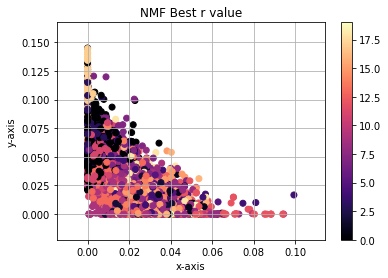

In [46]:
import numpy as np
# The below code finds the best r value
metrics = [homogenity,completeness,vmeasure,adjrand,adjmutualinfo]
print (metrics)
count_max = [np.argmax(z) for z in metrics]
bestr = r[max(set(count_max), key=count_max.count)]
print('Optimal/Best r value : ', bestr)
# The below does the k means
nmf = NMF(n_components = bestr, random_state = 0)
opt_matrix = nmf.fit_transform(tfidf_matrix)
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=1)
opt_kmeans = kmeans.fit_predict(opt_matrix)  
# The below code does NMF and plot
nmf = NMF(n_components = 2, random_state = 0)
two_dimmat = nmf.fit_transform(tfidf_matrix)
plt.scatter(two_dimmat[:,0],two_dimmat[:,1],c = opt_kmeans,cmap = 'magma')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('NMF Best r value')
plt.colorbar()
plt.grid(True)
plt.show()


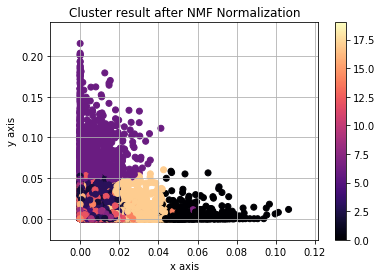

Metrics post NMF 

Homogeneity: 0.3054
Completeness: 0.3414
V-measure: 0.3224
Adjusted Rand-Index: 0.1178
Adjusted Mutual Info score: 0.3031


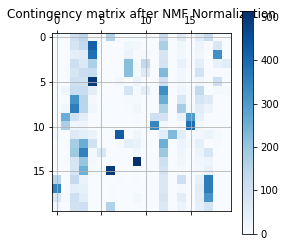

In [47]:
# The below code does normalize and prints the metrics and cluster after normalization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
scal_matrix = scaler.fit_transform(opt_matrix)

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=1)
ykm1 = kmeans.fit_predict(scal_matrix)  

#Visualising the results 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm1,cmap='magma')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Cluster result after NMF Normalization')
plt.colorbar()
plt.grid(True)
plt.show()

#Metrics
print('Metrics post NMF \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm1))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm1))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm1))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm1))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm1))
plt.matshow(confusion_matrix(y, ykm1),cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Contingency matrix after NMF Normalization')
plt.grid(True)
plt.show()

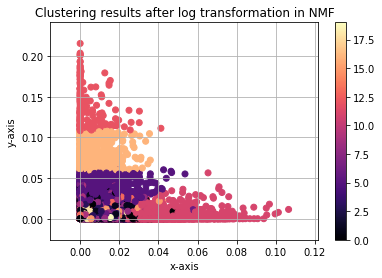

The performance metrics in NMF after log transformation 

Homogeneity: 0.3002
Completeness: 0.3332
V-measure: 0.3158
Adjusted Rand-Index: 0.1217
Adjusted Mutual Info score: 0.2979


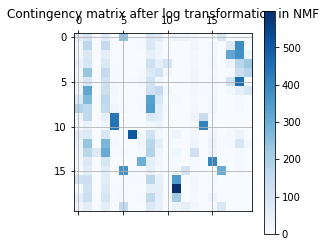

In [48]:
#  The below code does log transformation
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.log1p.html
optlog_matrix = np.log1p(opt_matrix)

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=5)
ykm2 = kmeans.fit_predict(optlog_matrix)  

#Visualising 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm2,cmap='magma')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Clustering results after log transformation in NMF')
plt.colorbar()
plt.grid(True)
plt.show()

#Metrics
print('The performance metrics in NMF after log transformation \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm2))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm2))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm2))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm2))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm2))
plt.matshow(confusion_matrix(y, ykm2),cmap=plt.cm.Blues)
plt.title('Contingency matrix after log transformation in NMF')
plt.colorbar()
plt.grid(True)
plt.show()

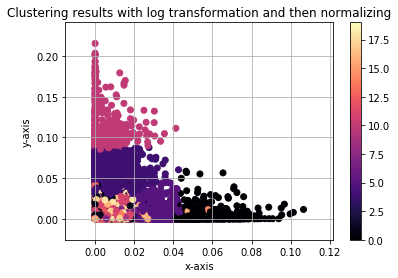

The performance metrics in NMF after log transformation and normalization 

Homogeneity: 0.3157
Completeness: 0.3493
V-measure: 0.3317
Adjusted Rand-Index: 0.1242
Adjusted Mutual Info score: 0.3135


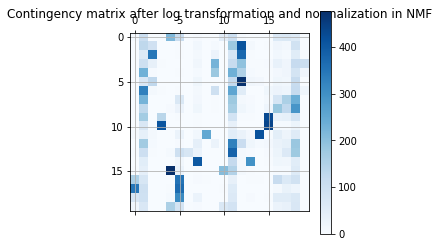

In [49]:
# The below code does log transform + Normalize
optlog_matrix = np.log1p(opt_matrix)
optimizer = StandardScaler()
scal_matrix = scaler.fit_transform(optlog_matrix)
from sklearn.metrics import confusion_matrix

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=5)
ykm4 = kmeans.fit_predict(scal_matrix)  

#Visualising the results 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm4,cmap='magma')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Clustering results with log transformation and then normalizing')
plt.colorbar()
plt.grid(True)
plt.show()

#Performance Metrics
print('The performance metrics in NMF after log transformation and normalization \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm4))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm4))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm4))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm4))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y, ykm4))
plt.matshow(confusion_matrix(y, ykm4),cmap=plt.cm.Blues)
plt.title('Contingency matrix after log transformation and normalization in NMF')
plt.colorbar()
plt.grid(True)
plt.show()

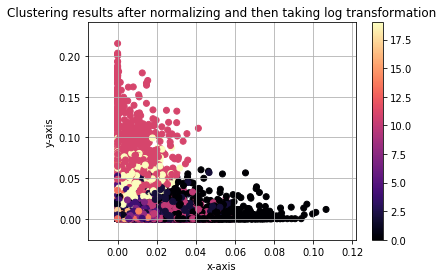

The performance metrics in NMF after normalization and log transformation 

Homogeneity: 0.3415
Completeness: 0.3556
V-measure: 0.3484
Adjusted Rand-Index: 0.1592
Adjusted Mutual Info score: 0.3394


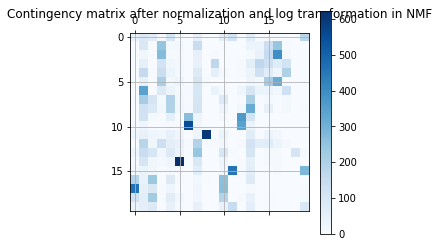

In [50]:
#The below code does Normalize + log transform
optimizer = StandardScaler()
optscaled_mat = optimizer.fit_transform(opt_matrix)
optscaled_mat -= optscaled_mat.min()
optlog_mat = np.log1p(optscaled_mat)

#Applying clustering on the scaled matrix
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 0, n_init=5)
ykm3 = kmeans.fit_predict(optlog_mat)  

#Visualising results 
plt.scatter(opt_matrix[:,0],opt_matrix[:,1],c = ykm3,cmap='magma')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Clustering results after normalizing and then taking log transformation')
plt.colorbar()
plt.grid(True)
plt.show()

# Metrics
print('The performance metrics in NMF after normalization and log transformation \n')
print("Homogeneity: %0.4f" % metrics.homogeneity_score(y, ykm3))
print("Completeness: %0.4f" % metrics.completeness_score(y, ykm3))
print("V-measure: %0.4f" % metrics.v_measure_score(y, ykm3))
print("Adjusted Rand-Index: %.4f"
      % metrics.adjusted_rand_score(y, ykm3))
print("Adjusted Mutual Info score: %.4f"
      % metrics.adjusted_mutual_info_score(y,ykm3))
plt.matshow(confusion_matrix(y, ykm3),cmap=plt.cm.Blues)
plt.title('Contingency matrix after normalization and log transformation in NMF')
plt.colorbar()
plt.grid(True)
plt.show()